In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, plot_precision_recall_curve, precision_recall_curve, precision_score, auc, roc_curve, cohen_kappa_score
import matplotlib.pyplot as plt     
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from statistics import mean
from scipy import interp
from sklearn.tree import DecisionTreeClassifier

from mlxtend.evaluate import mcnemar_table
from scipy import stats

In [2]:
data = pd.read_csv('~/full_feature_matrix.csv')
data.drop(['Unnamed: 0.1', 'Unnamed: 0', 'time'], axis = 1, inplace = True)
data.head()

,psg,cosine,hr,count,id
0,0.0,-0.258819,0.370269,8.398088,8692923
1,0.0,-0.260926,0.308924,4.365320,8692923
2,0.0,-0.263031,0.302677,1.617359,8692923
3,0.0,-0.265135,0.284527,0.425643,8692923
4,0.0,-0.267238,0.282227,0.079407,8692923


In [3]:
len(data['id'].unique())

31

In [4]:
def standardize(df):
    num_pipeline = Pipeline([('std_scaler', StandardScaler()),])

    numerical_features = df.columns
    full_pipeline = ColumnTransformer([("num", num_pipeline, numerical_features)])
    return full_pipeline

In [5]:
def group_patients(df):
    value_count = df.id.value_counts().reset_index()
    df_by_patient = df.set_index('id')
    df_s = [df_by_patient.loc[value_count[value_count.id == count]['index']] for count in value_count.id.unique()]
    return df_s

In [6]:
def binary_classification(y_train, y_test):
    for c,i in enumerate(y_train):
        if i >= 1:
            y_train.iloc[c] = 1
        else:
            y_train.iloc[c] = 0
    for c,i in enumerate(y_test):
        if i >= 1:
            y_test.iloc[c] = 1
        else:
            y_test.iloc[c] = 0
    return y_train, y_test

In [7]:
def test_stats(true_labels, predicted_labels, class_probabilities):
    kappa = cohen_kappa_score(true_labels, predicted_labels)
    print('Kappa: ', kappa)
    sleep_predictive_value = precision_score(true_labels, predicted_labels, pos_label=1)
    wake_predictive_value = precision_score(true_labels, predicted_labels, pos_label=0)
    false_positive_rates, true_positive_rates,_ = roc_curve(true_labels,
                                                                    class_probabilities[:, 1],
                                                                    pos_label=1,
                                                                    drop_intermediate=False)
    
    precision, recall, _ = precision_recall_curve(true_labels, class_probabilities[:,1], pos_label = 0)
    auc_value = auc(false_positive_rates, true_positive_rates)
    
    mean_fpr = np.linspace(0, 1, 100)
    mean_recall = np.linspace(0, 1, 100)
    
    prs = []
    prs.append(interp(mean_recall, precision, recall ))
    
    tprs = []
    tprs.append(interp(mean_fpr, false_positive_rates, true_positive_rates))
    tprs[-1][0] = 0.0
    return tprs, prs
    
    
    

In [8]:
def gnb(X_train, X_test, y_train, y_test):

    
    gnb_bi = GaussianNB()
    gnb_bi.fit(X_train, y_train)
    
    predicted_bi = gnb_bi.predict(X_test)
    print('Accuracy: ', gnb_bi.score(X_test, y_test))
    
    plot_confusion_matrix(gnb_bi, X_test, y_test)
    plt.show()
    
    print(classification_report(y_test, predicted_bi))
    
    predicted_ls = gnb_bi.predict_proba(X_test)
    tprs, prs = test_stats(y_test, predicted_bi, predicted_ls)
    return prs, tprs, predicted_bi

In [9]:
def gnb_bi_motion(X_train_motion, X_test_motion, y_train, y_test):    

    X_train_motion = X_train.drop([0, 1], axis = 1)
    X_test_motion = X_test.drop([0, 1], axis = 1)
    
    gnb_bi_motion = GaussianNB()
    gnb_bi_motion.fit(X_train_motion, y_train)
    
    predicted_bi = gnb_bi_motion.predict(X_test_motion)
    print('Accuracy: ', gnb_bi_motion.score(X_test_motion, y_test))
    
    plot_confusion_matrix(gnb_bi_motion, X_test_motion, y_test)
    plt.show()
    
    print(classification_report(y_test, predicted_bi))
    
    predicted_ls = gnb_bi_motion.predict_proba(X_test_motion)
    tprs, prs = test_stats(y_test, predicted_bi, predicted_ls)
    return prs, tprs, predicted_bi

In [10]:
def gnb_bi_hr(X_train_hr, X_test_hr, y_train, y_test):
    
    X_train_hr = X_train.drop([0, 2], axis = 1)
    X_test_hr = X_test.drop([0, 2], axis = 1)

    gnb_bi_hr = GaussianNB()
    gnb_bi_hr.fit(X_train_hr, y_train)
    
    predicted_bi = gnb_bi_hr.predict(X_test_hr)
    print('Accuracy: ', gnb_bi_hr.score(X_test_hr, y_test))
    
    plot_confusion_matrix(gnb_bi_hr, X_test_hr, y_test)
    plt.show()
    
    print(classification_report(y_test, predicted_bi))
    
    predicted_ls = gnb_bi_hr.predict_proba(X_test_hr)
    tprs, prs = test_stats(y_test, predicted_bi, predicted_ls)
    return prs, tprs, predicted_bi

In [11]:
def gnb_bi_hrmot(X_train_hrmot, X_test_hrmot, y_train, y_test):
    
    X_train_hrmot = X_train.drop([0], axis = 1)
    X_test_hrmot = X_test.drop([0], axis = 1)

    gnb_bi_hrmot = GaussianNB()
    gnb_bi_hrmot.fit(X_train_hrmot, y_train)
    
    predicted_bi = gnb_bi_hrmot.predict(X_test_hrmot)
    print('Accuracy: ', gnb_bi_hrmot.score(X_test_hrmot, y_test))
    
    plot_confusion_matrix(gnb_bi_hrmot, X_test_hrmot, y_test)
    plt.show()
    
    print(classification_report(y_test, predicted_bi))

    predicted_ls = gnb_bi_hrmot.predict_proba(X_test_hrmot)
    tprs, prs = test_stats(y_test, predicted_bi, predicted_ls)
    return prs, tprs, predicted_bi

In [12]:
def dt(X_train, X_test, y_train, y_test):
    d_tree = DecisionTreeClassifier(criterion='gini',max_depth=10, max_features = 1.0, min_samples_split=10, min_samples_leaf=32)
    d_tree.fit(X_train, y_train)

    predicted_tree = d_tree.predict(X_test)
    print('Accuracy: ', d_tree.score(X_test, y_test))

    plot_confusion_matrix(d_tree, X_test, y_test)
    plt.show()
    
    print(classification_report(y_test, predicted_tree))
        
    predicted_ls = d_tree.predict_proba(X_test)
    tprs, prs = test_stats(y_test, predicted_tree, predicted_ls)    
        return prs, tprs, predicted_tree


In [13]:
def dt_motion(X_train_motion, X_test_motion, y_train, y_test):    
    X_train_hr = X_train.drop([0, 2], axis = 1)
    X_test_hr = X_test.drop([0, 2], axis = 1)
    
    d_tree = DecisionTreeClassifier(criterion='gini',max_depth=10, max_features = 1.0, min_samples_split=10, min_samples_leaf=32)
    d_tree.fit(X_train, y_train)

    predicted_tree = d_tree.predict(X_test)
    print('Accuracy: ', d_tree.score(X_test, y_test))

    plot_confusion_matrix(d_tree, X_test, y_test)
    plt.show()
    
    print(classification_report(y_test, predicted_tree))
        
    predicted_ls = d_tree.predict_proba(X_test_motion)
    tprs, prs = test_stats(y_test, predicted_tree, predicted_ls)
    return prs, tprs, predicted_tree

In [14]:
def dt_hr(X_train_hr, X_test_hr, y_train, y_test):
    X_train_hr = X_train.drop([0, 2], axis = 1)
    X_test_hr = X_test.drop([0, 2], axis = 1)
    
    d_tree = DecisionTreeClassifier(criterion='gini',max_depth=10, max_features = 1.0, min_samples_split=10, min_samples_leaf=32)
    d_tree.fit(X_train_hr, y_train)

    predicted_tree = d_tree.predict(X_test_hr)
    print('Accuracy: ', d_tree.score(X_test_hr, y_test))

    plot_confusion_matrix(d_tree, X_test_hr, y_test)
    plt.show()
    
    print(classification_report(y_test, predicted_tree))
        
    predicted_ls = d_tree.predict_proba(X_test_hr)
    tprs, prs = test_stats(y_test, predicted_tree, predicted_ls)
    return prs, tprs, predicted_tree


In [15]:
def dt_hrmot(X_train_hrmot, X_test_hrmot, y_train, y_test):    
    X_train_hrmot = X_train.drop([0], axis = 1)
    X_test_hrmot = X_test.drop([0], axis = 1)
    
    d_tree = DecisionTreeClassifier(criterion='gini',max_depth=10, max_features = 1.0, min_samples_split=10, min_samples_leaf=32)
    d_tree.fit(X_train_hrmot, y_train)

    predicted_tree = d_tree.predict(X_test_hrmot)
    print('Accuracy: ', d_tree.score(X_test_hrmot, y_test))

    plot_confusion_matrix(d_tree, X_test_hrmot, y_test)
    plt.show()
    
    print(classification_report(y_test, predicted_tree))
        
    predicted_ls = d_tree.predict_proba(X_test_hrmot)
    tprs, prs = test_stats(y_test, predicted_tree, predicted_ls)
    return prs, tprs, predicted_tree


In [16]:
def mcnemar_test(cm):
    # McNemars Statistic 
    MCStatistic = ((cm[0,1] - cm[1,0])**2 )/ (cm[0,1] + cm[1,0])

    # Degree of freedom (n-1)*(k-1)
    degreOfFreedom = (len(cm[0])-1) * (len(cm[1])-1)

    r1 = 1- stats.chi2.cdf(MCStatistic , degreOfFreedom)
    r2 = stats.distributions.chi2.sf(MCStatistic , degreOfFreedom)

    if r1 > 0.05:
        print('Null hypothesis can not be rejected')
        print('There is not significant difference - p value :' , r1)
    else:
        print('Null hypothesis rejected')
        print('There is significant difference - p value :' , r1)

TRAIN: [ 0  1  3  4  5  7  8  9 11 12 14 15 16 18 20 21 22 24 25 26 27] 
TEST: [ 2  6 10 13 17 19 23]
GNB: Motion, HR, Clock 
Accuracy:  0.9242576387892698


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


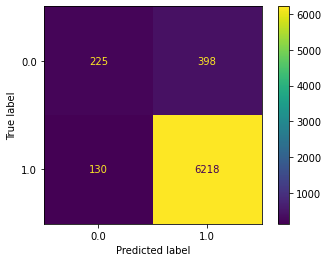

              precision    recall  f1-score   support

         0.0       0.63      0.36      0.46       623
         1.0       0.94      0.98      0.96      6348

    accuracy                           0.92      6971
   macro avg       0.79      0.67      0.71      6971
weighted avg       0.91      0.92      0.91      6971

Kappa:  0.42266506967192796
GNB: Motion
Accuracy:  0.9198106440969732


/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  prs.append(interp(mean_recall, precision, recall ))
/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, false_positive_rates, true_positive_rates))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


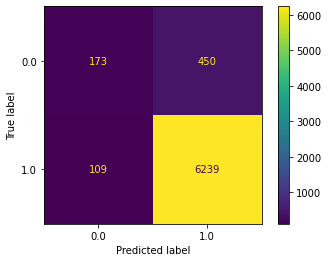

              precision    recall  f1-score   support

         0.0       0.61      0.28      0.38       623
         1.0       0.93      0.98      0.96      6348

    accuracy                           0.92      6971
   macro avg       0.77      0.63      0.67      6971
weighted avg       0.90      0.92      0.91      6971

Kappa:  0.34588912614817613
GNB: HR
Accuracy:  0.9122077176875628


/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  prs.append(interp(mean_recall, precision, recall ))
/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, false_positive_rates, true_positive_rates))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


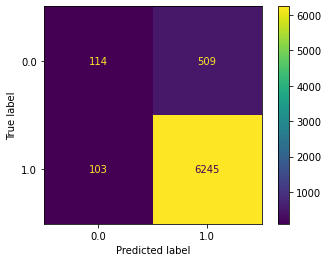

              precision    recall  f1-score   support

         0.0       0.53      0.18      0.27       623
         1.0       0.92      0.98      0.95      6348

    accuracy                           0.91      6971
   macro avg       0.72      0.58      0.61      6971
weighted avg       0.89      0.91      0.89      6971

Kappa:  0.23615847289417957
GNB: Motion, HR
Accuracy:  0.9203844498637211


/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  prs.append(interp(mean_recall, precision, recall ))
/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, false_positive_rates, true_positive_rates))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


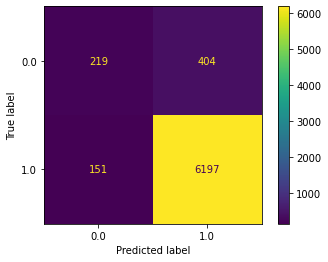

              precision    recall  f1-score   support

         0.0       0.59      0.35      0.44       623
         1.0       0.94      0.98      0.96      6348

    accuracy                           0.92      6971
   macro avg       0.77      0.66      0.70      6971
weighted avg       0.91      0.92      0.91      6971

Kappa:  0.4012079521660352
DT: Motion, HR, Clock 
Accuracy:  0.934155788265672


/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  prs.append(interp(mean_recall, precision, recall ))
/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, false_positive_rates, true_positive_rates))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


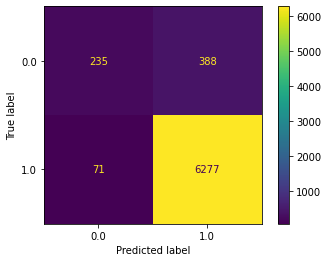

              precision    recall  f1-score   support

         0.0       0.77      0.38      0.51       623
         1.0       0.94      0.99      0.96      6348

    accuracy                           0.93      6971
   macro avg       0.85      0.68      0.74      6971
weighted avg       0.93      0.93      0.92      6971

Kappa:  0.47501182568764133


/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  prs.append(interp(mean_recall, precision, recall ))
/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, false_positive_rates, true_positive_rates))


DT: Motion
Accuracy:  0.934155788265672


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


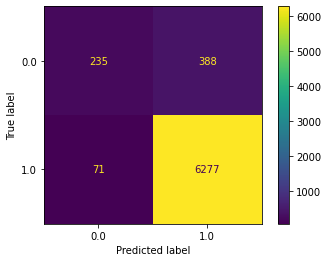

              precision    recall  f1-score   support

         0.0       0.77      0.38      0.51       623
         1.0       0.94      0.99      0.96      6348

    accuracy                           0.93      6971
   macro avg       0.85      0.68      0.74      6971
weighted avg       0.93      0.93      0.92      6971

Kappa:  0.47501182568764133
DT: HR


/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  prs.append(interp(mean_recall, precision, recall ))
/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, false_positive_rates, true_positive_rates))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  0.9129249748959977


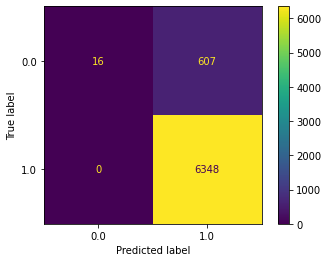

              precision    recall  f1-score   support

         0.0       1.00      0.03      0.05       623
         1.0       0.91      1.00      0.95      6348

    accuracy                           0.91      6971
   macro avg       0.96      0.51      0.50      6971
weighted avg       0.92      0.91      0.87      6971

Kappa:  0.045807754728626415
DT: Motion, HR


/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  prs.append(interp(mean_recall, precision, recall ))
/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, false_positive_rates, true_positive_rates))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  0.9182326782384163


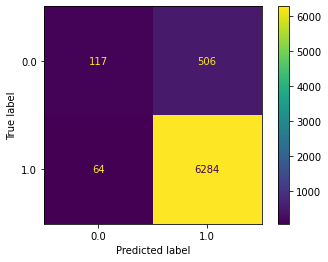

              precision    recall  f1-score   support

         0.0       0.65      0.19      0.29       623
         1.0       0.93      0.99      0.96      6348

    accuracy                           0.92      6971
   macro avg       0.79      0.59      0.62      6971
weighted avg       0.90      0.92      0.90      6971

Kappa:  0.2613211956220658
McNemar's Test for HR, Motion, and Clock
Contingency Table: 
 [[6339  104]
 [ 173  355]]
Null hypothesis rejected
There is significant difference - p value : 3.386171914876446e-05

McNemar's Test for Motion
Contingency Table: 
 [[6320   92]
 [ 192  367]]
Null hypothesis rejected
There is significant difference - p value : 2.958071010361607e-09

McNemar's Test for HR
Contingency Table: 
 [[6261   98]
 [ 103  509]]
Null hypothesis can not be rejected
There is not significant difference - p value : 0.7243337472317561

McNemar's Test for Motion, HR
Contingency Table: 
 [[6277  139]
 [ 124  431]]
Null hypothesis can not be rejected
There is no

/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  prs.append(interp(mean_recall, precision, recall ))
/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, false_positive_rates, true_positive_rates))


GNB: Motion, HR, Clock 
Accuracy:  0.9026695407063505


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


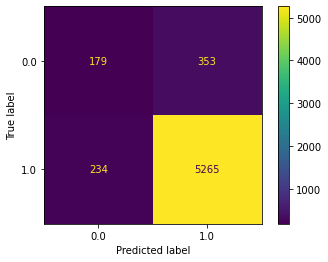

              precision    recall  f1-score   support

         0.0       0.43      0.34      0.38       532
         1.0       0.94      0.96      0.95      5499

    accuracy                           0.90      6031
   macro avg       0.69      0.65      0.66      6031
weighted avg       0.89      0.90      0.90      6031

Kappa:  0.326941215008832
GNB: Motion
Accuracy:  0.91361299950257


/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  prs.append(interp(mean_recall, precision, recall ))
/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, false_positive_rates, true_positive_rates))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


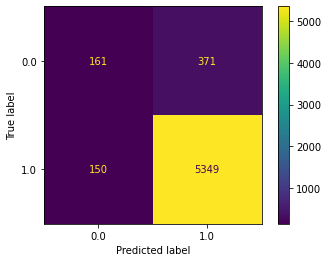

              precision    recall  f1-score   support

         0.0       0.52      0.30      0.38       532
         1.0       0.94      0.97      0.95      5499

    accuracy                           0.91      6031
   macro avg       0.73      0.64      0.67      6031
weighted avg       0.90      0.91      0.90      6031

Kappa:  0.3389439052904878
GNB: HR
Accuracy:  0.886585972475543


/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  prs.append(interp(mean_recall, precision, recall ))
/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, false_positive_rates, true_positive_rates))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


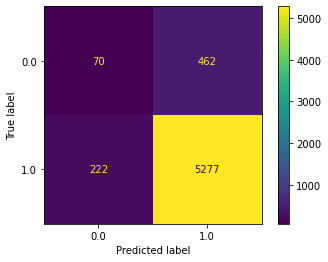

              precision    recall  f1-score   support

         0.0       0.24      0.13      0.17       532
         1.0       0.92      0.96      0.94      5499

    accuracy                           0.89      6031
   macro avg       0.58      0.55      0.55      6031
weighted avg       0.86      0.89      0.87      6031

Kappa:  0.11454571680257974
GNB: Motion, HR
Accuracy:  0.900016580998176


/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  prs.append(interp(mean_recall, precision, recall ))
/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, false_positive_rates, true_positive_rates))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


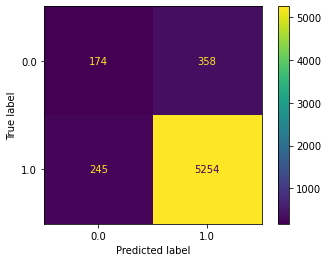

              precision    recall  f1-score   support

         0.0       0.42      0.33      0.37       532
         1.0       0.94      0.96      0.95      5499

    accuracy                           0.90      6031
   macro avg       0.68      0.64      0.66      6031
weighted avg       0.89      0.90      0.89      6031

Kappa:  0.3124908666238788
DT: Motion, HR, Clock 


/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  prs.append(interp(mean_recall, precision, recall ))
/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, false_positive_rates, true_positive_rates))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  0.9199137788094843


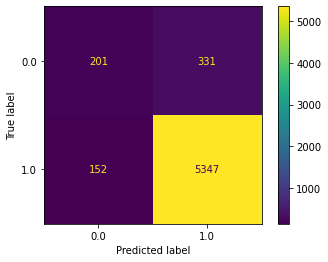

              precision    recall  f1-score   support

         0.0       0.57      0.38      0.45       532
         1.0       0.94      0.97      0.96      5499

    accuracy                           0.92      6031
   macro avg       0.76      0.68      0.71      6031
weighted avg       0.91      0.92      0.91      6031



/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  prs.append(interp(mean_recall, precision, recall ))
/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, false_positive_rates, true_positive_rates))


Kappa:  0.4129251973510649
DT: Motion
Accuracy:  0.9199137788094843


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


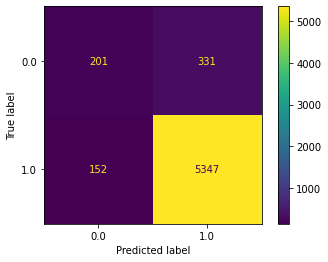

              precision    recall  f1-score   support

         0.0       0.57      0.38      0.45       532
         1.0       0.94      0.97      0.96      5499

    accuracy                           0.92      6031
   macro avg       0.76      0.68      0.71      6031
weighted avg       0.91      0.92      0.91      6031

Kappa:  0.4129251973510649
DT: HR


/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  prs.append(interp(mean_recall, precision, recall ))
/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, false_positive_rates, true_positive_rates))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  0.8996849610346543


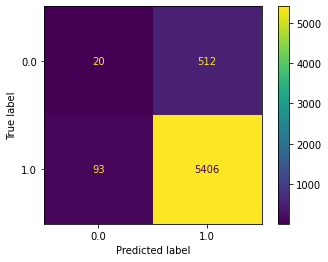

              precision    recall  f1-score   support

         0.0       0.18      0.04      0.06       532
         1.0       0.91      0.98      0.95      5499

    accuracy                           0.90      6031
   macro avg       0.55      0.51      0.50      6031
weighted avg       0.85      0.90      0.87      6031

Kappa:  0.03209963066643695
DT: Motion, HR
Accuracy:  0.9099651799038302


/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  prs.append(interp(mean_recall, precision, recall ))
/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, false_positive_rates, true_positive_rates))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


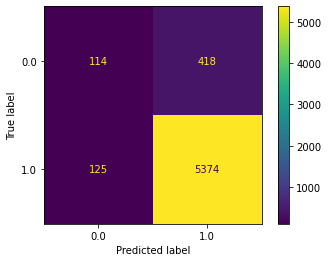

              precision    recall  f1-score   support

         0.0       0.48      0.21      0.30       532
         1.0       0.93      0.98      0.95      5499

    accuracy                           0.91      6031
   macro avg       0.70      0.60      0.62      6031
weighted avg       0.89      0.91      0.89      6031

Kappa:  0.25497559494085575
McNemar's Test for HR, Motion, and Clock
Contingency Table: 
 [[5287  157]
 [ 261  326]]
Null hypothesis rejected
There is significant difference - p value : 3.641434511703068e-07

McNemar's Test for Motion
Contingency Table: 
 [[5353  157]
 [ 195  326]]
Null hypothesis rejected
There is significant difference - p value : 0.042825609230891404

McNemar's Test for HR
Contingency Table: 
 [[5297   50]
 [ 129  555]]
Null hypothesis rejected
There is significant difference - p value : 3.5320927294080207e-09

McNemar's Test for Motion, HR
Contingency Table: 
 [[5356   72]
 [ 132  471]]
Null hypothesis rejected
There is significant difference -

/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  prs.append(interp(mean_recall, precision, recall ))
/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, false_positive_rates, true_positive_rates))


GNB: Motion, HR, Clock 
Accuracy:  0.9312283021987106


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


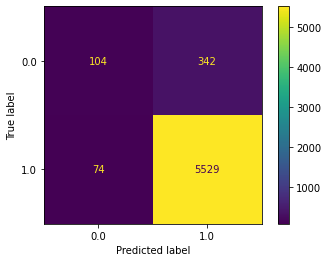

              precision    recall  f1-score   support

         0.0       0.58      0.23      0.33       446
         1.0       0.94      0.99      0.96      5603

    accuracy                           0.93      6049
   macro avg       0.76      0.61      0.65      6049
weighted avg       0.92      0.93      0.92      6049

Kappa:  0.30405885281265554
GNB: Motion
Accuracy:  0.9330467845924947


/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  prs.append(interp(mean_recall, precision, recall ))
/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, false_positive_rates, true_positive_rates))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


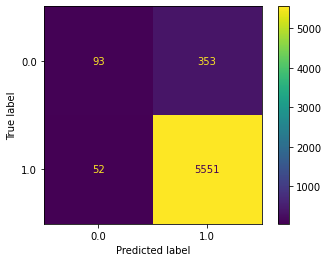

              precision    recall  f1-score   support

         0.0       0.64      0.21      0.31       446
         1.0       0.94      0.99      0.96      5603

    accuracy                           0.93      6049
   macro avg       0.79      0.60      0.64      6049
weighted avg       0.92      0.93      0.92      6049

Kappa:  0.2889971293982301
GNB: HR
Accuracy:  0.9193255083484874


/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  prs.append(interp(mean_recall, precision, recall ))
/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, false_positive_rates, true_positive_rates))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


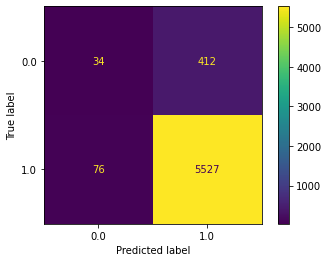

              precision    recall  f1-score   support

         0.0       0.31      0.08      0.12       446
         1.0       0.93      0.99      0.96      5603

    accuracy                           0.92      6049
   macro avg       0.62      0.53      0.54      6049
weighted avg       0.88      0.92      0.90      6049

Kappa:  0.09592652530194867
GNB: Motion, HR
Accuracy:  0.9284179203174079


/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  prs.append(interp(mean_recall, precision, recall ))
/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, false_positive_rates, true_positive_rates))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


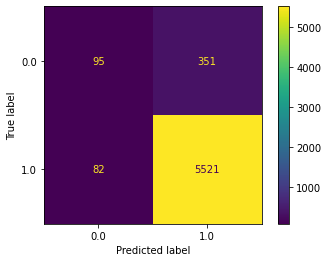

              precision    recall  f1-score   support

         0.0       0.54      0.21      0.30       446
         1.0       0.94      0.99      0.96      5603

    accuracy                           0.93      6049
   macro avg       0.74      0.60      0.63      6049
weighted avg       0.91      0.93      0.91      6049

Kappa:  0.2745843330398491
DT: Motion, HR, Clock 


/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  prs.append(interp(mean_recall, precision, recall ))
/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, false_positive_rates, true_positive_rates))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  0.9413126136551496


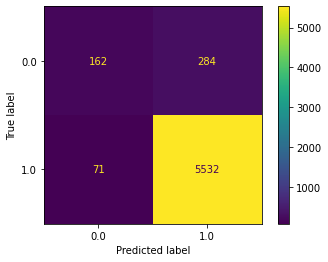

              precision    recall  f1-score   support

         0.0       0.70      0.36      0.48       446
         1.0       0.95      0.99      0.97      5603

    accuracy                           0.94      6049
   macro avg       0.82      0.68      0.72      6049
weighted avg       0.93      0.94      0.93      6049

Kappa:  0.44930611742470383
DT: Motion


/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  prs.append(interp(mean_recall, precision, recall ))
/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, false_positive_rates, true_positive_rates))


Accuracy:  0.9413126136551496


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


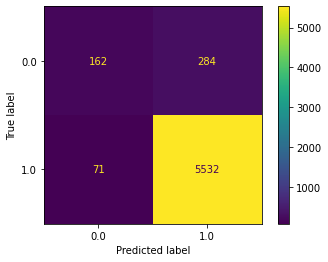

              precision    recall  f1-score   support

         0.0       0.70      0.36      0.48       446
         1.0       0.95      0.99      0.97      5603

    accuracy                           0.94      6049
   macro avg       0.82      0.68      0.72      6049
weighted avg       0.93      0.94      0.93      6049

Kappa:  0.44930611742470383
DT: HR


/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  prs.append(interp(mean_recall, precision, recall ))
/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, false_positive_rates, true_positive_rates))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  0.9257728550173583


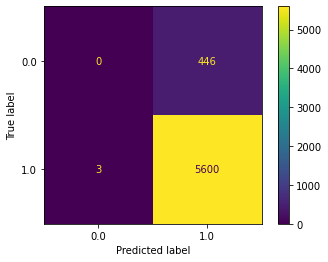

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       446
         1.0       0.93      1.00      0.96      5603

    accuracy                           0.93      6049
   macro avg       0.46      0.50      0.48      6049
weighted avg       0.86      0.93      0.89      6049

Kappa:  -0.000986243815245258
DT: Motion, HR


/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  prs.append(interp(mean_recall, precision, recall ))
/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, false_positive_rates, true_positive_rates))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  0.9290791866424203


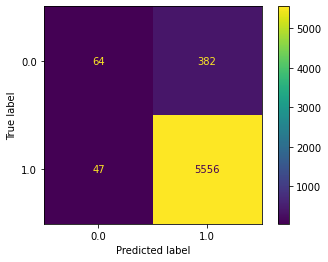

              precision    recall  f1-score   support

         0.0       0.58      0.14      0.23       446
         1.0       0.94      0.99      0.96      5603

    accuracy                           0.93      6049
   macro avg       0.76      0.57      0.60      6049
weighted avg       0.91      0.93      0.91      6049

Kappa:  0.20648378533832423
McNemar's Test for HR, Motion, and Clock
Contingency Table: 
 [[5530  103]
 [ 164  252]]
Null hypothesis rejected
There is significant difference - p value : 0.0001891078817748415

McNemar's Test for Motion
Contingency Table: 
 [[5543  101]
 [ 151  254]]
Null hypothesis rejected
There is significant difference - p value : 0.0016343599239135864

McNemar's Test for HR
Contingency Table: 
 [[5527   34]
 [  73  415]]
Null hypothesis rejected
There is significant difference - p value : 0.00016306952101741157

McNemar's Test for Motion, HR
Contingency Table: 
 [[5554   62]
 [  66  367]]
Null hypothesis can not be rejected
There is not signific

/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  prs.append(interp(mean_recall, precision, recall ))
/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, false_positive_rates, true_positive_rates))


GNB: Motion, HR, Clock 
Accuracy:  0.9141524105754277


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


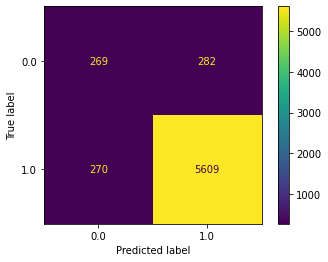

              precision    recall  f1-score   support

         0.0       0.50      0.49      0.49       551
         1.0       0.95      0.95      0.95      5879

    accuracy                           0.91      6430
   macro avg       0.73      0.72      0.72      6430
weighted avg       0.91      0.91      0.91      6430

Kappa:  0.44668529672836954
GNB: Motion
Accuracy:  0.9163297045101089


/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  prs.append(interp(mean_recall, precision, recall ))
/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, false_positive_rates, true_positive_rates))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


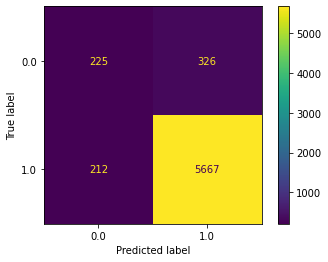

              precision    recall  f1-score   support

         0.0       0.51      0.41      0.46       551
         1.0       0.95      0.96      0.95      5879

    accuracy                           0.92      6430
   macro avg       0.73      0.69      0.71      6430
weighted avg       0.91      0.92      0.91      6430

Kappa:  0.4108016908108063
GNB: HR
Accuracy:  0.913841368584759


/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  prs.append(interp(mean_recall, precision, recall ))
/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, false_positive_rates, true_positive_rates))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


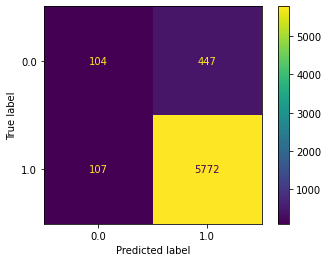

              precision    recall  f1-score   support

         0.0       0.49      0.19      0.27       551
         1.0       0.93      0.98      0.95      5879

    accuracy                           0.91      6430
   macro avg       0.71      0.59      0.61      6430
weighted avg       0.89      0.91      0.90      6430

Kappa:  0.23674423168974223
GNB: Motion, HR
Accuracy:  0.9116640746500778


/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  prs.append(interp(mean_recall, precision, recall ))
/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, false_positive_rates, true_positive_rates))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


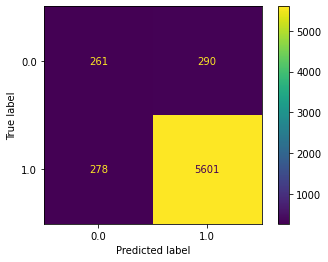

              precision    recall  f1-score   support

         0.0       0.48      0.47      0.48       551
         1.0       0.95      0.95      0.95      5879

    accuracy                           0.91      6430
   macro avg       0.72      0.71      0.72      6430
weighted avg       0.91      0.91      0.91      6430

Kappa:  0.43064718938716284
DT: Motion, HR, Clock 


/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  prs.append(interp(mean_recall, precision, recall ))
/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, false_positive_rates, true_positive_rates))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  0.9332814930015552


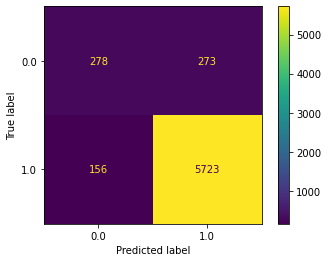

              precision    recall  f1-score   support

         0.0       0.64      0.50      0.56       551
         1.0       0.95      0.97      0.96      5879

    accuracy                           0.93      6430
   macro avg       0.80      0.74      0.76      6430
weighted avg       0.93      0.93      0.93      6430

Kappa:  0.5288920328687841
DT: Motion


/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  prs.append(interp(mean_recall, precision, recall ))
/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, false_positive_rates, true_positive_rates))


Accuracy:  0.9332814930015552


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


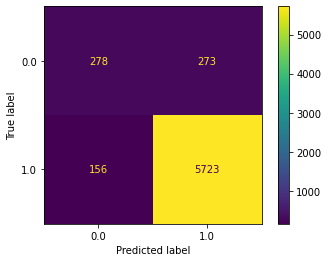

              precision    recall  f1-score   support

         0.0       0.64      0.50      0.56       551
         1.0       0.95      0.97      0.96      5879

    accuracy                           0.93      6430
   macro avg       0.80      0.74      0.76      6430
weighted avg       0.93      0.93      0.93      6430

Kappa:  0.5288920328687841
DT: HR


/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  prs.append(interp(mean_recall, precision, recall ))
/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, false_positive_rates, true_positive_rates))


Accuracy:  0.910108864696734


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


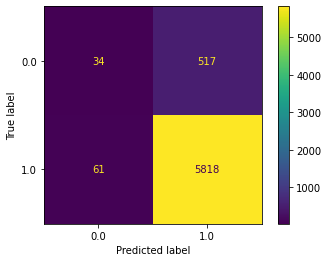

              precision    recall  f1-score   support

         0.0       0.36      0.06      0.11       551
         1.0       0.92      0.99      0.95      5879

    accuracy                           0.91      6430
   macro avg       0.64      0.53      0.53      6430
weighted avg       0.87      0.91      0.88      6430

Kappa:  0.08212956491458578
DT: Motion, HR


/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  prs.append(interp(mean_recall, precision, recall ))
/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, false_positive_rates, true_positive_rates))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  0.9233281493001555


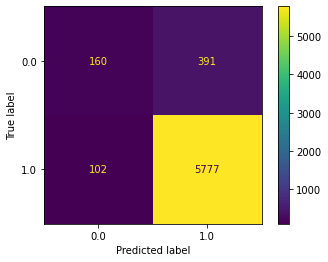

              precision    recall  f1-score   support

         0.0       0.61      0.29      0.39       551
         1.0       0.94      0.98      0.96      5879

    accuracy                           0.92      6430
   macro avg       0.77      0.64      0.68      6430
weighted avg       0.91      0.92      0.91      6430

Kappa:  0.35815428075999645
McNemar's Test for HR, Motion, and Clock
Contingency Table: 
 [[5734  144]
 [ 267  285]]
Null hypothesis rejected
There is significant difference - p value : 1.3020596822954644e-09

McNemar's Test for Motion
Contingency Table: 
 [[5762  130]
 [ 239  299]]
Null hypothesis rejected
There is significant difference - p value : 1.3924604691517573e-08

McNemar's Test for HR
Contingency Table: 
 [[5806   70]
 [  46  508]]
Null hypothesis rejected
There is significant difference - p value : 0.025857580463442886

McNemar's Test for Motion, HR
Contingency Table: 
 [[5740  122]
 [ 197  371]]
Null hypothesis rejected
There is significant difference 

/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  prs.append(interp(mean_recall, precision, recall ))
/var/folders/13/zhmdzj4n4v733rggv_tsl0c40000gn/T/ipykernel_49232/1509115502.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, false_positive_rates, true_positive_rates))


In [17]:
ls_patients = group_patients(data)
patients = range(len(ls_patients))
kf = KFold(n_splits = 4, shuffle = True)

gnb_prec = []
gnb_mot_prec = []
gnb_hr_prec = []
gnb_hrmot_prec = []

dt_prec = []
dt_mot_prec = []
dt_hr_prec = []
dt_hrmot_prec = []

tprs_scores = []
tprs_scores_mot = []
tprs_scores_hr = []
tprs_scores_hrmot = []

dt_tprs_scores = []
dt_tprs_scores_mot = []
dt_tprs_scores_hr = []
dt_tprs_scores_hrmot = []

for train_index, test_index in kf.split(patients):
    print("TRAIN:", train_index, "\nTEST:", test_index)
    train_df, test_df = [ls_patients[i] for i in train_index], [ls_patients[i] for i in test_index]
    train_df = pd.concat(train_df)
    test_df = pd.concat(test_df)
    
    y_train = train_df['psg']
    y_test = test_df['psg']

    train_df.drop('psg', axis = 1, inplace = True)
    test_df.drop('psg', axis = 1, inplace = True)
    
    pipeline = standardize(train_df)
    X_train = pd.DataFrame(pipeline.fit_transform(train_df))
    X_test = pd.DataFrame(pipeline.transform(test_df))

    y_train, y_test = binary_classification(y_train, y_test)
    print('GNB: Motion, HR, Clock ')
    gnb_prec_score, tprs, gnb_ls = gnb(X_train, X_test, y_train, y_test)
    print('GNB: Motion')
    gnb_mot_prec_score, tprs_mot, gnb_ls_mot = gnb_bi_motion(X_train, X_test, y_train, y_test)
    print('GNB: HR')
    gnb_hr_prec_score, tprs_hr, gnb_ls_hr = gnb_bi_hr(X_train, X_test, y_train, y_test)
    print('GNB: Motion, HR')
    gnb_hrmot_prec_score, tprs_hrmot, gnb_ls_hrmot = gnb_bi_hrmot(X_train, X_test, y_train, y_test)
    
    gnb_prec.append(gnb_prec_score)
    gnb_mot_prec.append(gnb_mot_prec_score)
    gnb_hr_prec.append(gnb_hr_prec_score)
    gnb_hrmot_prec.append(gnb_hrmot_prec_score)

    tprs_scores.append(tprs)
    tprs_scores_mot.append(tprs_mot)
    tprs_scores_hr.append(tprs_hr)
    tprs_scores_hrmot.append(tprs_hrmot)
        
    print('DT: Motion, HR, Clock ')
    dt_prec_score, tprs, dt_ls = dt(X_train, X_test, y_train, y_test)
    print('DT: Motion')
    dt_mot_prec_score, tprs_mot, dt_ls_mot = dt_motion(X_train, X_test, y_train, y_test)
    print('DT: HR')
    dt_hr_prec_score, tprs_hr, dt_ls_hr = dt_hr(X_train, X_test, y_train, y_test)
    print('DT: Motion, HR')
    dt_hrmot_prec_score, tprs_hrmot, dt_ls_hrmot = dt_hrmot(X_train, X_test, y_train, y_test)
    
    dt_prec.append(dt_prec_score)
    dt_mot_prec.append(dt_mot_prec_score)
    dt_hr_prec.append(dt_hr_prec_score)
    dt_hrmot_prec.append(dt_hrmot_prec_score)
    
    dt_tprs_scores.append(tprs)
    dt_tprs_scores_mot.append(tprs_mot)
    dt_tprs_scores_hr.append(tprs_hr)
    dt_tprs_scores_hrmot.append(tprs_hrmot)


    tb = mcnemar_table(y_target = y_test, y_model1 = gnb_ls, y_model2 = dt_ls)
    tb_mot = mcnemar_table(y_target = y_test, y_model1 = gnb_ls_mot, y_model2 = dt_ls_mot)
    tb_hr = mcnemar_table(y_target = y_test, y_model1 = gnb_ls_hr, y_model2 = dt_ls_hr)
    tb_hrmot = mcnemar_table(y_target = y_test, y_model1 = gnb_ls_hrmot, y_model2 = dt_ls_hrmot)
    print("McNemar's Test for HR, Motion, and Clock")
    print('Contingency Table: \n', tb)
    mcnemar_test(tb)
    print("\nMcNemar's Test for Motion")
    print('Contingency Table: \n', tb_mot)
    mcnemar_test(tb_mot)
    print("\nMcNemar's Test for HR")
    print('Contingency Table: \n', tb_hr)
    mcnemar_test(tb_hr)
    print("\nMcNemar's Test for Motion, HR")
    print('Contingency Table: \n', tb_hrmot)
    mcnemar_test(tb_hrmot)


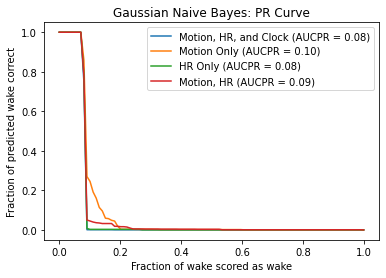

In [18]:
mean_recall = np.linspace(0,1,100)
mean_prec = np.mean(gnb_prec, axis = 0)

mean_pre_mot = np.mean(gnb_mot_prec, axis = 0)
mean_pre_hr = np.mean(gnb_hr_prec, axis = 0)
mean_pre_hrmot = np.mean(gnb_hrmot_prec, axis = 0)

gnb_aucpr = auc(mean_recall, mean_prec[0])
gnb_mot_aucpr = auc(mean_recall, mean_pre_mot[0])
gnb_hr_aucpr = auc(mean_recall, mean_pre_hr[0])
gnb_hrmot_aucpr = auc(mean_recall, mean_pre_hrmot[0])

plt.plot(mean_recall, mean_prec[0], label = 'Motion, HR, and Clock (AUCPR = %0.2f)' % (gnb_aucpr))
plt.plot(mean_recall, mean_pre_mot[0], label = 'Motion Only (AUCPR = %0.2f)' % (gnb_mot_aucpr))
plt.plot(mean_recall, mean_pre_hr[0], label = 'HR Only (AUCPR = %0.2f)' % (gnb_hr_aucpr))
plt.plot(mean_recall, mean_pre_hrmot[0], label = 'Motion, HR (AUCPR = %0.2f)' % (gnb_hrmot_aucpr))
plt.title('Gaussian Naive Bayes: PR Curve')
plt.xlabel('Fraction of wake scored as wake')
plt.ylabel('Fraction of predicted wake correct')
plt.legend(loc = 'best')
plt.savefig('GNB: PR Curve_0.jpg')
plt.show()

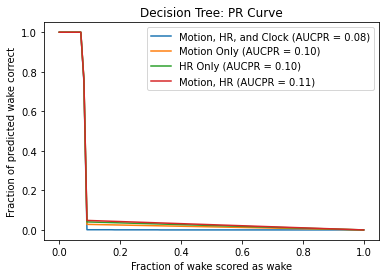

In [19]:
mean_recall = np.linspace(0,1,100)
dt_mean_prec = np.mean(gnb_prec, axis = 0)

dt_mean_pre_mot = np.mean(dt_mot_prec, axis = 0)
dt_mean_pre_hr = np.mean(dt_hr_prec, axis = 0)
dt_mean_pre_hrmot = np.mean(dt_hrmot_prec, axis = 0)

dt_aucpr = auc(mean_recall, dt_mean_prec[0])
dt_mot_aucpr = auc(mean_recall, dt_mean_pre_mot[0])
dt_hr_aucpr = auc(mean_recall, dt_mean_pre_hr[0])
dt_hrmot_aucpr = auc(mean_recall, dt_mean_pre_hrmot[0])

plt.plot(mean_recall, dt_mean_prec[0], label = 'Motion, HR, and Clock (AUCPR = %0.2f)' % (dt_aucpr))
plt.plot(mean_recall, dt_mean_pre_mot[0], label = 'Motion Only (AUCPR = %0.2f)' % (dt_mot_aucpr))
plt.plot(mean_recall, dt_mean_pre_hr[0], label = 'HR Only (AUCPR = %0.2f)' % (dt_hr_aucpr))
plt.plot(mean_recall, dt_mean_pre_hrmot[0], label = 'Motion, HR (AUCPR = %0.2f)' % (dt_hrmot_aucpr))
plt.title('Decision Tree: PR Curve')
plt.xlabel('Fraction of wake scored as wake')
plt.ylabel('Fraction of predicted wake correct')
plt.legend(loc = 'best')
plt.savefig('DT: PR Curve_0.jpg')
plt.show()

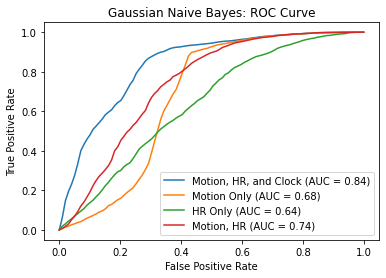

In [50]:
mean_fpr = np.linspace(0,1,100)
mean_tpr = np.mean(tprs_scores, axis = 0)

mean_tpr_mot = np.mean(tprs_scores_mot, axis = 0)
mean_tpr_hr = np.mean(tprs_scores_hr, axis = 0)
mean_tpr_hrmot = np.mean(tprs_scores_hrmot, axis = 0)

gnb_auc = auc(mean_fpr, mean_tpr[0])
gnb_mot_auc = auc(mean_fpr, mean_tpr_mot[0])
gnb_hr_auc = auc(mean_fpr, mean_tpr_hr[0])
gnb_hrmot_auc = auc(mean_fpr, mean_tpr_hrmot[0])

plt.plot(mean_fpr, mean_tpr[0], label = 'Motion, HR, and Clock (AUC = %0.2f)' % (gnb_auc))
plt.plot(mean_fpr, mean_tpr_mot[0], label = 'Motion Only (AUC = %0.2f)' % (gnb_mot_auc))
plt.plot(mean_fpr, mean_tpr_hr[0], label = 'HR Only (AUC = %0.2f)' % (gnb_hr_auc))
plt.plot(mean_fpr, mean_tpr_hrmot[0], label = 'Motion, HR (AUC = %0.2f)' % (gnb_hrmot_auc))
plt.title('Gaussian Naive Bayes: ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'best')
plt.savefig('GNB: ROC Curve.jpg')
plt.show()

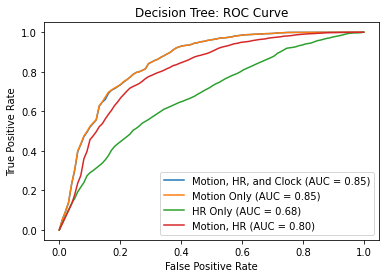

In [51]:
mean_fpr = np.linspace(0,1,100)
dt_mean_tpr = np.mean(dt_tprs_scores, axis = 0)

dt_mean_tpr_mot = np.mean(dt_tprs_scores_mot, axis = 0)
dt_mean_tpr_hr = np.mean(dt_tprs_scores_hr, axis = 0)
dt_mean_tpr_hrmot = np.mean(dt_tprs_scores_hrmot, axis = 0)

dt_auc = auc(mean_fpr, dt_mean_tpr[0])
dt_mot_auc = auc(mean_fpr, dt_mean_tpr_mot[0])
dt_hr_auc = auc(mean_fpr, dt_mean_tpr_hr[0])
dt_hrmot_auc = auc(mean_fpr, dt_mean_tpr_hrmot[0])

plt.plot(mean_fpr, dt_mean_tpr[0], label = 'Motion, HR, and Clock (AUC = %0.2f)' % (dt_auc))
plt.plot(mean_fpr, dt_mean_tpr_mot[0], label = 'Motion Only (AUC = %0.2f)' % (dt_mot_auc))
plt.plot(mean_fpr, dt_mean_tpr_hr[0], label = 'HR Only (AUC = %0.2f)' % (dt_hr_auc))
plt.plot(mean_fpr, dt_mean_tpr_hrmot[0], label = 'Motion, HR (AUC = %0.2f)' % (dt_hrmot_auc))
plt.title('Decision Tree: ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'best')
plt.savefig('DT: ROC Curve.jpg')
plt.show()